# Importing the data and Libraries

In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings(action="ignore")
sns.set()

In [2]:
data=pd.read_csv("iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# How it works and parameters

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
#knn=KNeighborsClassifier(metric="wminkowski",metric_params={'w':1},p=2)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

## Parameters
#---Algorithm----
* ‘ball_tree’ will use BallTree
* ‘kd_tree’ will use KDTree
* ‘brute’ will use a brute-force search.
* ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

#---leaf_size,p,n_neighnors --integer

#---Weights
* uniform
* distance

#---Metric


![](MetricMeasure.png)

In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data["class"]=label.fit_transform(data["class"])

In [6]:
label.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
x,y=data.drop(["class",'petal_length','petal_width'],axis=1),data.iloc[:,-1]

In [8]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [9]:
x_test=[[7.6,3.0]]
print(knn.kneighbors(x_test))
test=knn.kneighbors(x_test)[1][0]

(array([[0.        , 0.1       , 0.2236068 , 0.28284271]]), array([[105, 135, 122, 130]]))


In [10]:
dr=x.iloc[test]
dr["distance from test"]=knn.kneighbors(x_test)[0][0]
dr

,sepal_length,sepal_width,distance from test
105,7.6,3.0,0.000000
135,7.7,3.0,0.100000
122,7.7,2.8,0.223607
130,7.4,2.8,0.282843


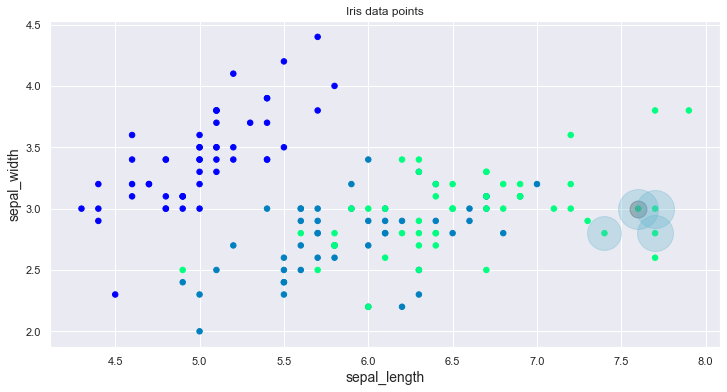

In [11]:
%matplotlib inline
plt.figure(figsize=(12, 6))

xs = x.iloc[:, 0]
ys = x.iloc[:, 1]

# all the training points
plt.scatter(xs, ys, s=30, c=data['class'], marker='o', cmap='winter') 
# test point 1
plt.scatter(x_test[0][0], 
            x_test[0][1], 
            s=290, 
            c='k',
            alpha=.3) 

size_reduction = 150
size_neigh = 1600

for ind in test:
    test1_x = x.iloc[ind]['sepal_length']
    test1_y = x.iloc[ind]['sepal_width']
    
    plt.scatter(test1_x, 
               test1_y, 
               s=size_neigh, 
               c='c',
               marker='o',
               alpha=.3)   
    size_neigh = size_neigh -size_reduction
  
plt.title('Iris data points')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14);

In [12]:
knn.predict(x_test)

array([2])

# Applying KNN

Applying Stratified KFold and Grid Search CV.

In [13]:
n_neighbors = [3, 5, 7, 9, 11, 13, 15, 19, 23, 29]
algos       = ['ball_tree', 'kd_tree', 'brute']
dist_metric = ['minkowski']
p_root      = [1, 2,3]
weights     = ['uniform', 'distance']
leaf_size   = [15, 30, 40, 50, 60]
parameters1 = dict(
                n_neighbors= n_neighbors,
                algorithm= algos,
                metric= dist_metric,
                p= p_root,
                weights= weights,
                leaf_size= leaf_size
            )

In [14]:
x_data=data.drop('class',axis=1)
y_data=data["class"]

In [15]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score
stf=StratifiedKFold(n_splits=2)
gs=GridSearchCV(KNeighborsClassifier(),parameters1,scoring="accuracy",cv=stf)

In [16]:
gs.fit(x_data,y_data)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30, 40, 50, 60],
                         'metric': ['minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 23, 29],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [17]:
gs.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'metric': 'minkowski',
 'n_neighbors': 7,
 'p': 3,
 'weights': 'distance'}

In [18]:
clf=KNeighborsClassifier(**gs.best_params_)

In [19]:
clf.fit(x_data,y_data)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=3,
                     weights='distance')

## Decision Boundary

In [25]:
import itertools
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
gra=list(itertools.combinations(data.columns[:-1],2))

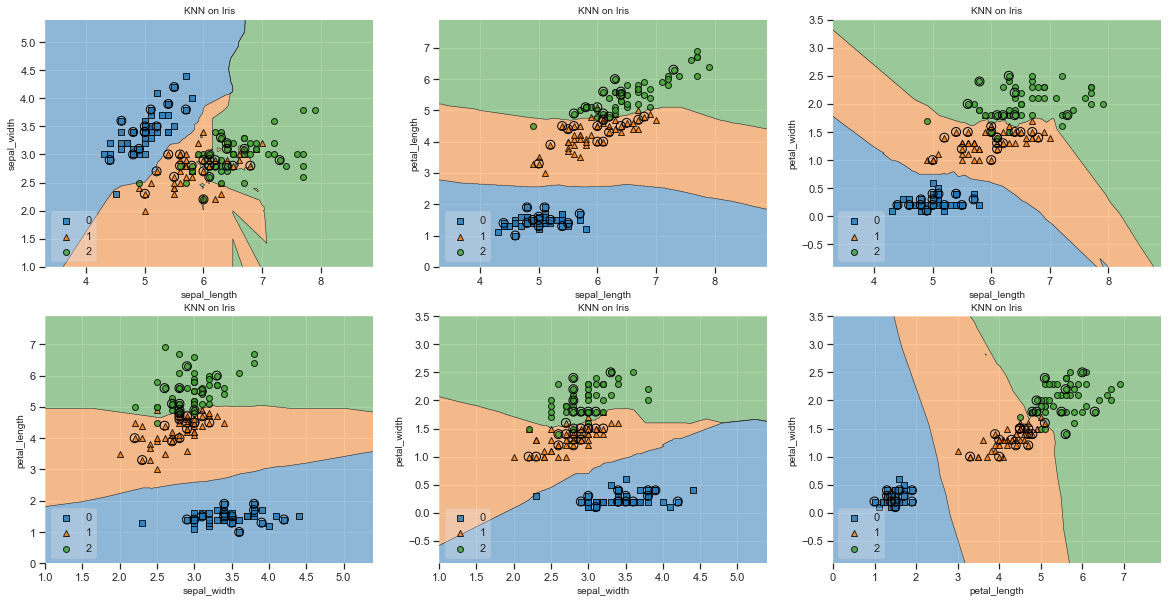

In [27]:
fig=plt.figure(figsize=(20,10))
for i,j in enumerate(gra,1):
    x=x_data.loc[:,j].values
    y=y_data.values
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
    clf1=KNeighborsClassifier(n_neighbors=5)
    clf1.fit(x_train,y_train)
    
    ax=fig.add_subplot(2,3,i)
    plot_decision_regions(x, y, clf=clf1, legend=3,X_highlight=x_test)

    # Adding axes annotations
    plt.xlabel(j[0], fontsize=10)
    plt.ylabel(j[1], fontsize=10)
    plt.title('KNN on Iris', fontsize=10);